In [ ]:
# https://docs.astropy.org/en/stable/nddata/utils.html#d-cutout-from-a-skycoord-position

In [8]:
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open(fitsfilename)[0]

wcs = WCS(hdul.header)
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(hdul.data)



NameError: name 'fitsfilename' is not defined

In [ ]:
ax = fig.gca()
ax.scatter([34], [3.2], transform=ax.get_transform('world'))


In [2]:
import matplotlib 
#matplotlib.use('TkAgg')
import glob 
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy.io import fits

name="NGC4051"

hri = glob.glob(name + '*HRI*.fits')
dss = glob.glob(name + '*DSS*.fits')    

if len(hri) == 1 and len(dss) == 1:
    pass
else:
    print("need to store HRI and DSS fits")

F = plt.figure(figsize=(10,8))

hrifilename = hri[0]
hriname = hrifilename.replace(".fits",".png")
hrihdu = fits.open(hrifilename)[0]
hriwcs = WCS(hrihdu.header)
hridata = hrihdu.data

hrixlen, hriylen = hridata.shape
hricx = int(0.5 * hrixlen)
hricy = int(0.5 * hriylen)
hridx = int(hrixlen*0.1)
hriwcscut = hriwcs[hricx-hridx:hricx+hridx,hricy-hridx:hricy+hridx]

dssfilename = dss[0]
dssname = dssfilename.replace(".fits",".png")
dsshdu = fits.open(dssfilename)[0]
dsswcs = WCS(dsshdu.header)
dssdata = dsshdu.data

dssxlen, dssylen = dssdata.shape
dsscx = int(0.5 * dssxlen)
dsscy = int(0.5 * dssylen)
dssdx = int(dssxlen*0.1)
dsswcscut = dsswcs[dsscx-dssdx:dsscx+dssdx,dsscy-dssdx:dsscy+dssdx]

plt.figtext(0.45,0.93, name, size="large")
plt.figtext(0.15,0.9, "X-ray, Rosat HRI")
plt.figtext(0.57,0.9, "Optical, UK Shimidt")                

plt.subplot(221, projection=dsswcs)
#       plt.subplot(221, projection=hriwcs)     
try:
    plt.imshow(hridata, origin='lower', norm=LogNorm())
    plt.colorbar()                  
except:
    print("ERROR, couldn't plot log-z scale")           
    plt.close()

plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

plt.subplot(223, projection=dsswcscut)
#       plt.subplot(223, projection=hriwcscut)      
plt.imshow(hridata[hricx-hridx:hricx+hridx,hricy-hridx:hricy+hridx], origin='lower')
plt.colorbar()      
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')


plt.subplot(222, projection=dsswcs)
try:
    plt.imshow(dssdata, origin='lower', norm=LogNorm())
    plt.colorbar()                              
except: 
    print("ERROR, couldn't plot log-z scale")
    plt.imshow(dssdata, origin='lower')
    plt.colorbar()      

plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')

plt.subplot(224, projection=dsswcscut)
plt.imshow(dssdata[dsscx-dssdx:dsscx+dssdx,dsscy-dssdx:dsscy+dssdx], origin='lower')
plt.colorbar()      
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')

plt.savefig(name  + ".png")
plt.close()



need to store HRI and DSS fits


ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

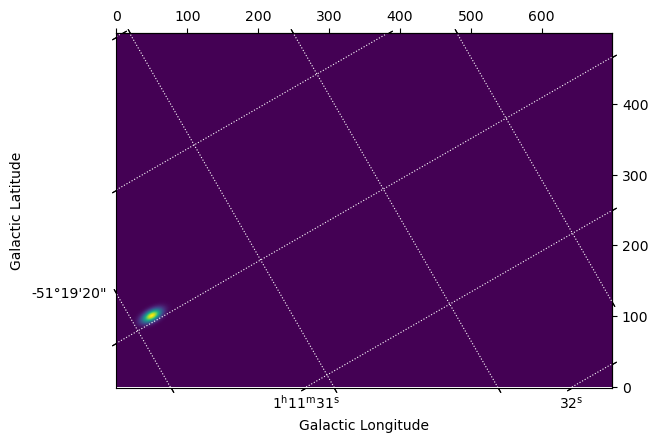

In [5]:
import numpy as np
from astropy.modeling.models import Gaussian2D

y, x = np.mgrid[0:500, 0:700]
data = Gaussian2D(1, 50, 100, 10, 5, theta=0.5)(x, y)

import matplotlib.pyplot as plt

import astropy.units as u

from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

position = SkyCoord('01h11m29.96s -51d19m18.7s', frame='icrs')
wcs = WCS(naxis=2)
rho = np.pi / 3.
scale = 0.05 / 3600.
wcs.wcs.cd = [[scale*np.cos(rho), -scale*np.sin(rho)],
              [scale*np.sin(rho), scale*np.cos(rho)]]
wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']
wcs.wcs.crval = [position.ra.to_value(u.deg),
                 position.dec.to_value(u.deg)]
wcs.wcs.crpix = [50, 100]

ax = plt.subplot(projection=wcs)
plt.grid(color='white', ls='dotted')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.imshow(data)

secax = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secax = ax.secondary_yaxis('right', functions=(lambda y: y, lambda y: y))

#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#overlay[0].set_axislabel('Right Ascension (J2000)')
#overlay[1].set_axislabel('Declination (J2000)')



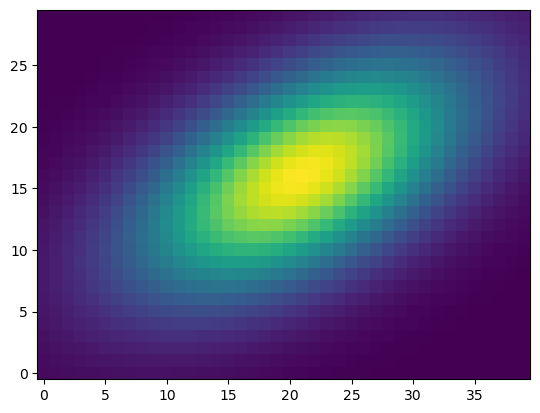

In [6]:
from astropy.nddata import Cutout2D

cutout = Cutout2D(data, position, (30, 40), wcs=wcs)
#plt.subplot(projection=wcs)
plt.imshow(cutout.data, origin='lower')   



In [7]:
from astropy.wcs.utils import pixel_to_skycoord
x_cutout, y_cutout = (5, 10)
pixel_to_skycoord(x_cutout, y_cutout, cutout.wcs)  

<SkyCoord (ICRS): (ra, dec) in deg
    (17.87476289, -51.32207626)>

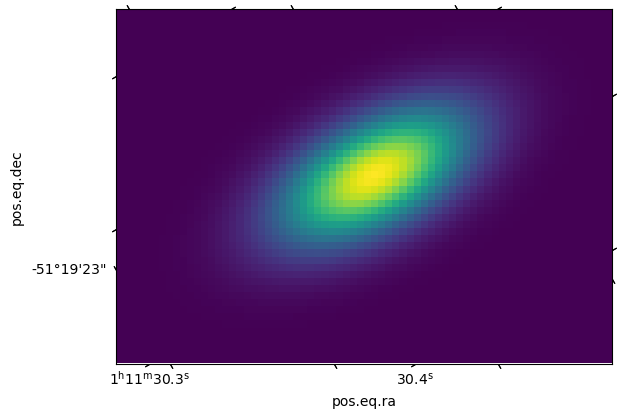

In [4]:
size = u.Quantity((2.5, 3.5), u.arcsec)
cutout = Cutout2D(data, position, size, wcs=wcs)
plt.subplot(projection=wcs)
plt.imshow(cutout.data, origin='lower') 
plt.subplot()
plt.imshow(cutout.data, origin='lower') 